In [2]:
import pandas as pd
import eda_utils as utils
from prep_data_utils import DataProcessor
import numpy as np
import matplotlib.pyplot as plt

## Load and check data

Looking at the data, we can see that some data transformation are needed. For example, 'Gender' need to be in binary format, while 'Region_Code' and 'Policy_Sales_Channel' need to be transformed into categorical format with one-hot encoding

In [3]:
data_df = pd.read_csv('data/raw/train.csv')
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Checking the 'Response' let us know that this is a binary classification problem with unbalanced dataset.

In [4]:
utils.count_values(data_df, 'Response')

,Response,count,percentage
0,0,334399,87.74
1,1,46710,12.26


Fortunately, we don't have null value. But the common method would be to remove the data since the data size is sufficient

In [15]:
check_empty = utils.count_nan(data_df)
check_empty[check_empty['count'] != 0]


,column,count,percentage


For faster visualization and model training, we sample a fraction of the data

In [16]:
data_df = data_df.sample(frac=0.3, replace=False, random_state=42).reset_index(drop=True)
data_df.shape

(114333, 12)

In [19]:
utils.count_values(data_df, 'Response')

,Response,count,percentage
0,0,100195,87.63
1,1,14138,12.37


<Figure size 432x288 with 0 Axes>

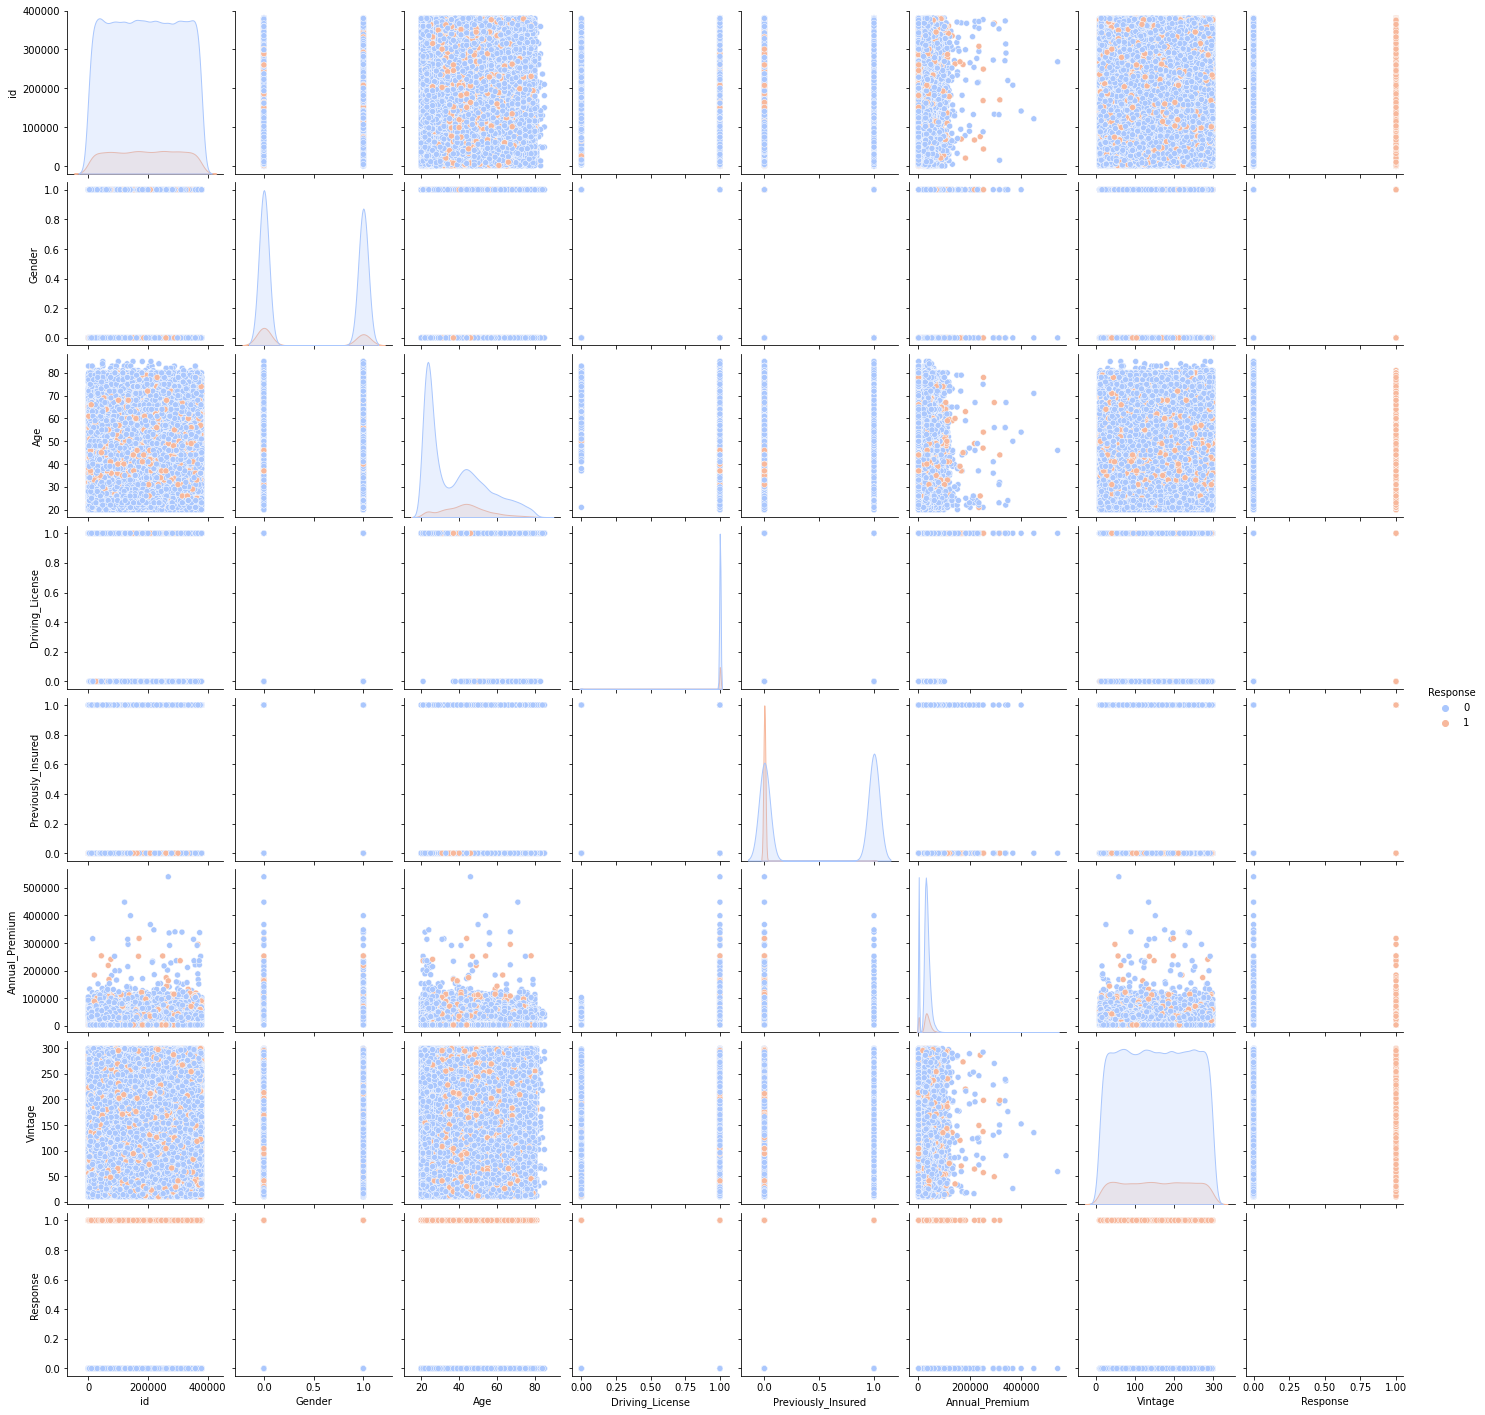

In [17]:
utils.show_pairplot(data_df, highest_only = True)

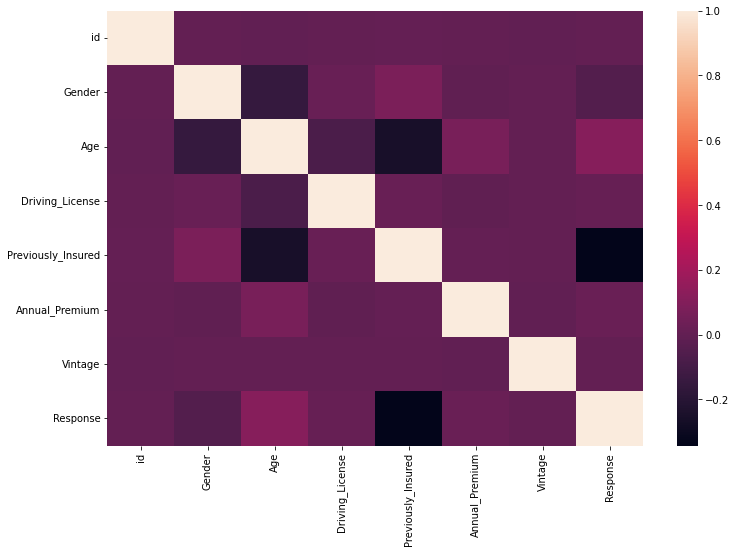

In [18]:
utils.show_heatmap(data_df)

In [8]:
dataProcessor = DataProcessor(data_df)
dataProcessor.process_data()
train_df, test_df = dataProcessor.split_train_test()

(381109, 12)

In [11]:
data_df[['Age', 'Vintage', 'Annual_Premium']]

,Age,Vintage,Annual_Premium
0,21,72,20408.0
1,55,102,37498.0
2,41,90,2630.0
3,26,268,2630.0
4,51,265,34006.0
...,...,...,...
114328,24,166,63100.0
114329,30,161,2630.0
114330,41,170,2630.0
114331,29,272,49693.0


In [16]:
processor = DataProcessor(data_df)
processed_df = processor.process_data()
train_df, test_df = processor.split_train_test()

In [17]:
train_df

,Gender,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Region_Code_1,Region_Code_10,Region_Code_11,...,Policy_Sales_Channel_90,Policy_Sales_Channel_91,Policy_Sales_Channel_92,Policy_Sales_Channel_93,Policy_Sales_Channel_94,Policy_Sales_Channel_95,Policy_Sales_Channel_96,Policy_Sales_Channel_97,Policy_Sales_Channel_98,Policy_Sales_Channel_99
82374,0,0.169231,1,0,0.000000,0.588235,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81394,1,0.661538,1,1,0.087552,0.941176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14350,0,0.692308,1,0,0.067415,0.899654,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85284,1,0.030769,1,1,0.053345,0.795848,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62748,0,0.000000,1,1,0.080806,0.332180,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60832,1,0.538462,1,0,0.071361,0.252595,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2371,1,0.123077,1,1,0.000000,0.235294,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26899,0,0.492308,1,0,0.066016,0.608997,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39814,0,0.092308,1,0,0.055758,0.771626,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import os
# if exist delete the file
if os.path.exists('data/processed/train.csv'):
    os.remove('data/processed/train.csv')
if os.path.exists('data/processed/test.csv'):
    os.remove('data/processed/test.csv')

train_df.to_csv('data/processed/train.csv', index=False)
test_df.to_csv('data/processed/test.csv', index=False)

In [ ]:

predict = utils.check_outlier(train_df, ['Age', 'Vintage', 'Annual_Premium'])

In [ ]:
pd.DataFrame(predict).value_counts()

 1    90551
-1      915
dtype: int64

Text(0.5, 0, 'Annual_Premium')

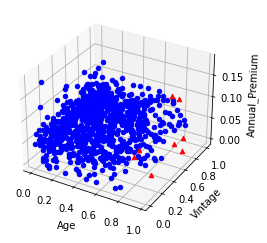

In [ ]:
viz_df = train_df[['Age', 'Vintage', 'Annual_Premium']].copy()
viz_df['outlier'] = predict

small_df = viz_df.sample(frac=0.01, replace=False, random_state=42).reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(small_df)):
    if small_df.iloc[i]['outlier'] == 1:
        ax.scatter(small_df.iloc[i]['Age'], small_df.iloc[i]['Vintage'], small_df.iloc[i]['Annual_Premium'], marker='o', c = 'b')
    else:
        ax.scatter(small_df.iloc[i]['Age'], small_df.iloc[i]['Vintage'], small_df.iloc[i]['Annual_Premium'], marker='^', c = 'r')
# ax.scatter(small_df[['Age']], small_df[['Vintage']], small_df[['Annual_Premium']], marker = 'o')

ax.set_xlabel('Age')
ax.set_ylabel('Vintage')
ax.set_zlabel('Annual_Premium')
